In [1]:
import pandas as pd


df = pd.read_csv(r"C:\Users\Lenovo\Desktop\Exo\commandes_2024_2025_clique_pub.csv")


df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'])


df['Mois'] = df['Order_Date'].dt.to_period('M').astype(str)


df['delai_livraison'] = (df['Delivery_Date'] - df['Order_Date']).dt.days


df.head()


,Order_ID,Product,Category,Order_Date,Amount,Quantity,Customer_ID,City,Region,Delivery_Date,a_clique_pub,Mois,delai_livraison
0,ORD1000,Casque Bluetooth,Électronique,2024-09-06,455.05,3,CUST742,Marseille,Provence-Alpes-Côte d’Azur,2024-09-15,0,2024-09,9
1,ORD1001,Téléphone,Électronique,2024-09-26,127.39,1,CUST761,Marseille,Provence-Alpes-Côte d’Azur,2024-10-01,1,2024-09,5
2,ORD1002,Téléphone,Électronique,2024-12-07,81.00,1,CUST140,Nantes,Pays de la Loire,2024-12-13,1,2024-12,6
3,ORD1003,Laptop,Électronique,2024-06-06,249.83,4,CUST416,Lille,Hauts-de-France,2024-06-16,0,2024-06,10
4,ORD1004,Téléphone,Électronique,2024-01-24,492.97,3,CUST907,Toulouse,Occitanie,2024-02-01,0,2024-01,8


In [2]:
# Chiffre d'affaires total
ca_total = df['Amount'].sum()

# Nombre de commandes
nb_commandes = df.shape[0]

# Panier moyen
panier_moyen = ca_total / nb_commandes

# Chiffre d'affaires par mois
ca_mensuel = df.groupby('Mois')['Amount'].sum()

# Top 5 produits vendus (en quantité)
top_produits = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(5)

# CA par catégorie
ca_par_categorie = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)

# CA par région
ca_par_region = df.groupby('Region')['Amount'].sum().sort_values(ascending=False)


In [3]:
# Délai moyen de livraison
delai_moyen = df['delai_livraison'].mean()

# Délai moyen par région
delai_par_region = df.groupby('Region')['delai_livraison'].mean().sort_values(ascending=False)

# Nombre de commandes avec délai > 7 jours
nb_lentes = df[df['delai_livraison'] > 7].shape[0]

# Pourcentage de commandes lentes
pourcentage_lentes = (nb_lentes / nb_commandes) * 100


In [4]:
print(f"⏱️ Délai moyen de livraison : {delai_moyen:.2f} jours")
print("📍 Délai moyen par région :")
print(delai_par_region)
print(f"⚠️ Commandes livrées en plus de 7 jours : {nb_lentes} soit {pourcentage_lentes:.2f}%")


⏱️ Délai moyen de livraison : 11.47 jours
📍 Délai moyen par région :
Region
Hauts-de-France               12.933333
Auvergne-Rhône-Alpes          12.615385
Île-de-France                 11.642857
Occitanie                     11.285714
Pays de la Loire              11.200000
Provence-Alpes-Côte d’Azur     9.705882
Name: delai_livraison, dtype: float64
⚠️ Commandes livrées en plus de 7 jours : 68 soit 68.00%


In [5]:
# Taux de clics pub (1 = oui, 0 = non)
taux_clic_pub = (df['a_clique_pub'].sum() / nb_commandes) * 100

# CA généré par les clients ayant cliqué sur une pub
ca_pub = df[df['a_clique_pub'] == 1]['Amount'].sum()
part_ca_pub = (ca_pub / ca_total) * 100

# Comparaison entre clients qui ont cliqué vs pas cliqué
comparaison_pub = df.groupby('a_clique_pub').agg({
    'Order_ID': 'count',
    'Amount': ['sum', 'mean'],
    'Quantity': 'mean'
})


In [6]:
print(f"📢 Taux de clics pub : {taux_clic_pub:.2f}%")
print(f"💰 Part du CA généré par la pub : {part_ca_pub:.2f}%")
print("\n📊 Comparaison clic pub vs non clic :")
print(comparaison_pub)


📢 Taux de clics pub : 47.00%
💰 Part du CA généré par la pub : 48.77%

📊 Comparaison clic pub vs non clic :
             Order_ID    Amount              Quantity
                count       sum        mean      mean
a_clique_pub                                         
0                  53  13482.63  254.389245  2.641509
1                  47  12836.02  273.106809  2.425532


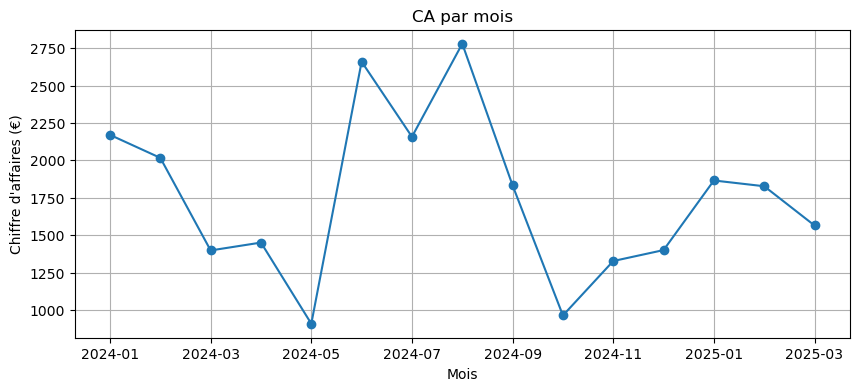

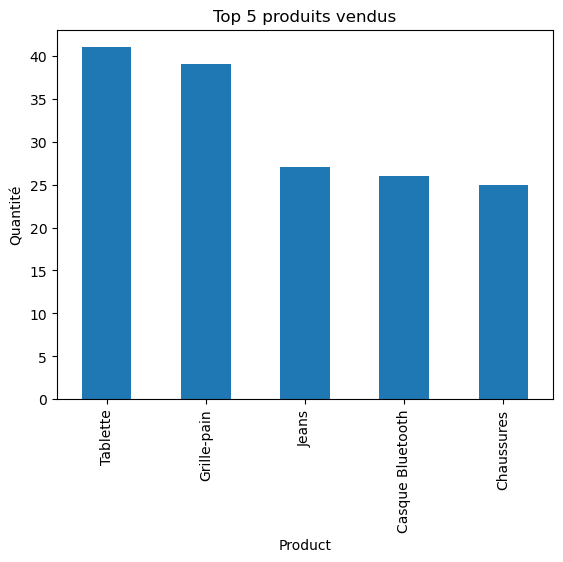

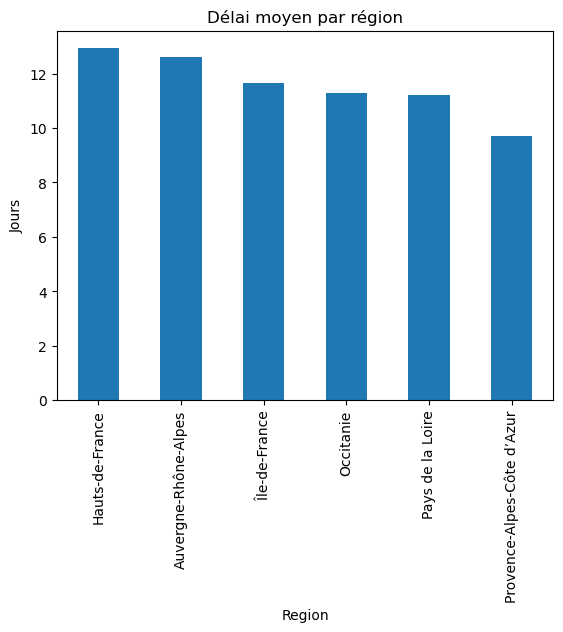

In [7]:
import matplotlib.pyplot as plt

# CA par mois
df.groupby('Mois')['Amount'].sum().plot(kind='line', marker='o', title="CA par mois", figsize=(10, 4))
plt.xlabel("Mois")
plt.ylabel("Chiffre d'affaires (€)")
plt.grid(True)
plt.show()

# Top produits
top_produits.plot(kind='bar', title="Top 5 produits vendus", ylabel="Quantité")
plt.show()

# Délai moyen par région
delai_par_region.plot(kind='bar', title="Délai moyen par région", ylabel="Jours")
plt.show()


In [8]:
print("📊 PERFORMANCES COMMERCIALES")
print(f"- Chiffre d'affaires total : {ca_total:.2f} €")
print(f"- Nombre de commandes : {nb_commandes}")
print(f"- Panier moyen : {panier_moyen:.2f} €")
print("\nTop 5 produits vendus :")
print(top_produits)

print("\n📦 CA par catégorie :")
print(ca_par_categorie)

print("\n📍 CA par région :")
print(ca_par_region)

print("\n🚚 LOGISTIQUE")
print(f"- Délai moyen de livraison : {delai_moyen:.2f} jours")
print(f"- % de commandes > 7 jours : {pourcentage_lentes:.2f}%")
print("Délai moyen par région :")
print(delai_par_region)

print("\n📢 PUBLICITÉ")
print(f"- Taux de clics sur pub : {taux_clic_pub:.2f}%")
print(f"- Part du CA généré par pub : {part_ca_pub:.2f}%")
print("Comparaison pub vs non pub :")
print(comparaison_pub)


📊 PERFORMANCES COMMERCIALES
- Chiffre d'affaires total : 26318.65 €
- Nombre de commandes : 100
- Panier moyen : 263.19 €

Top 5 produits vendus :
Product
Tablette            41
Grille-pain         39
Jeans               27
Casque Bluetooth    26
Chaussures          25
Name: Quantity, dtype: int64

📦 CA par catégorie :
Category
Électronique    10375.63
Maison           8827.80
Mode             7115.22
Name: Amount, dtype: float64

📍 CA par région :
Region
Pays de la Loire              5130.12
Provence-Alpes-Côte d’Azur    5111.59
Hauts-de-France               5101.24
Occitanie                     4798.16
Île-de-France                 3236.64
Auvergne-Rhône-Alpes          2940.90
Name: Amount, dtype: float64

🚚 LOGISTIQUE
- Délai moyen de livraison : 11.47 jours
- % de commandes > 7 jours : 68.00%
Délai moyen par région :
Region
Hauts-de-France               12.933333
Auvergne-Rhône-Alpes          12.615385
Île-de-France                 11.642857
Occitanie                     11.285714


In [9]:
# Exporter les données utiles
ca_mensuel.to_csv("ca_par_mois.csv")
top_produits.to_csv("top_5_produits.csv")
delai_par_region.to_csv("delai_par_region.csv")
comparaison_pub.to_csv("comparaison_pub.csv")
